In [4]:
import glob
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
ifile='../data/data/GRW70/F218W/flt_cleans/F218W_photcat.dat'

In [5]:
def load_phot_data(ifile):

    """ Reads in and parses photometry catalog.
        
        Returns:
        
            Pandas dataframe with important values from file (mjd, chip, flux in different 
            radii, etc... All acessable by name.
            
    """
    
    filtername = (os.path.basename(ifile)).replace('_photcat.dat', '')
    
    
    df = pd.read_csv(ifile,index_col = False)
    amp = np.array(df['amp'].tolist())
    back = np.array(df['back'].tolist())
    chip= np.array(df['chip'].tolist())
    expt= np.array(df['exptime'].tolist())
    f10 = np.array(df['f10'].tolist())
    ferr10 = np.array(df['f10err'].tolist())
    m10 = np.array(df['m10'].tolist())
    merr10 = np.array(df['m10err'].tolist())
    imagefilename = np.array(df['#filename'].tolist())
    mjd = np.array(df['mjd'].tolist())
    xc = np.array(df['xc'].tolist())
    yc = np.array(df['yc'].tolist())
    axis1= np.array(df['axis1'].tolist())
    axis2 = np.array(df['axis2'].tolist())
    shut= np.array(df['shutter'].tolist())

    #Measure the radius from center of the image.
    rads = np.sqrt((xc-axis1/2.0)**2 + (yc-axis2/2.0)**2)
    d = {'amp':amp, 'back':back, 'chip':chip, 'expt':expt, 'filtername': filtername, \
    'f10':f10, 'ferr10':ferr10,'imagefilename':imagefilename, 'mjd':mjd, 'rads':rads, \
    'shut':shut,'m10':m10, 'merr10':merr10}
    
    df=pd.DataFrame(data=d)
    #print df['ferr10']
    return df

In [9]:
df = load_phot_data(ifile)

amp_A_df = df[df['amp']=='A']
amp_B_df = df[df['amp']=='B']
amp_C_df = df[df['amp']=='C']
amp_D_df = df[df['amp']=='D']

In [13]:
flux_A = np.array(amp_A_df['f10'].tolist())/np.array(amp_A_df['expt'].tolist())
mjd_A = np.array(amp_A_df['mjd'].tolist())

flux_B = np.array(amp_B_df['f10'].tolist())/np.array(amp_B_df['expt'].tolist())
mjd_B = np.array(amp_B_df['mjd'].tolist())

flux_C = np.array(amp_C_df['f10'].tolist())/np.array(amp_C_df['expt'].tolist())
mjd_C = np.array(amp_C_df['mjd'].tolist())

flux_D = np.array(amp_D_df['f10'].tolist())/np.array(amp_D_df['expt'].tolist())
mjd_D = np.array(amp_D_df['mjd'].tolist())


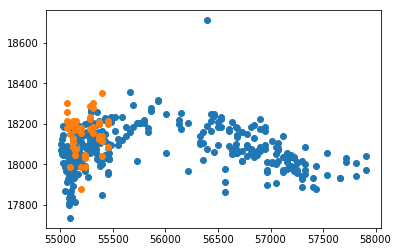

In [16]:
plt.scatter(mjd_A,flux_A)
plt.scatter(mjd_B,flux_B)

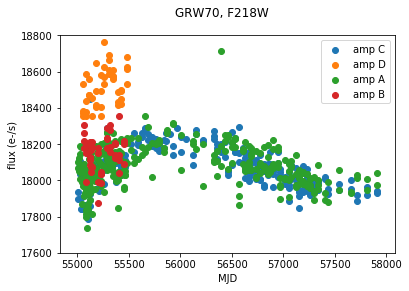

In [24]:
plt.scatter(mjd_C,flux_C,label = 'amp C')
plt.scatter(mjd_D,flux_D,label = 'amp D')
plt.scatter(mjd_A,flux_A,label = 'amp A')
plt.scatter(mjd_B,flux_B,label = 'amp B')
plt.legend(loc='best')
plt.ylim(17600,18800)
plt.xlabel('MJD')
plt.ylabel('flux (e-/s)')
plt.suptitle('GRW70, F218W')